# Student Placement Predictor

### The dataset was downloaded from Kaggle data repository [here](https://www.kaggle.com/datasets/tejashvi14/engineering-placements-prediction).The data collected over two years was compiled in a csv file (*collegePlace.csv*) with 8 columns as following-
  1. Age 
  2. Gender
  3. Stream
  4. Internships
  5. CGPA
  6. Hostel
  7. HistoryOfBacklogs
  8. PlacedOrNot

where the 8th column is the label to be predicted

**This is a binary classification task where we need to predict whether the person with given attributes will be placed or not**

### Downloading the csv file and getting it from Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Reading the csv file

In [7]:
df=pd.read_csv('/content/gdrive/MyDrive/collegePlace.csv')
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [8]:
df.shape

(2966, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [10]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [11]:
#checking correlaton between the label and the features so we can decide to drop some
df.corr()['PlacedOrNot']

<ipython-input-11-2507135b70a6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['PlacedOrNot']


Age                  0.046943
Internships          0.179334
CGPA                 0.588648
Hostel              -0.038182
HistoryOfBacklogs   -0.022337
PlacedOrNot          1.000000
Name: PlacedOrNot, dtype: float64

### EDA and Feature Engineering

In [12]:
# checking missing values
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [13]:
# duplicate rows
print(df.duplicated().sum())

#drop duplicates
df.drop_duplicates(inplace=True)

1829


In [14]:
# Check if the duplicate rows are removed
print(df.duplicated().sum())

0


In [15]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2946,23,Male,Information Technology,1,7,1,1,0
2952,23,Male,Mechanical,0,8,1,0,1
2954,23,Female,Computer Science,1,8,0,1,1
2958,23,Male,Computer Science,0,6,0,1,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 2960
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1137 non-null   int64 
 1   Gender             1137 non-null   object
 2   Stream             1137 non-null   object
 3   Internships        1137 non-null   int64 
 4   CGPA               1137 non-null   int64 
 5   Hostel             1137 non-null   int64 
 6   HistoryOfBacklogs  1137 non-null   int64 
 7   PlacedOrNot        1137 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 79.9+ KB


In [13]:
encoder=LabelEncoder()
gen=encoder.fit_transform(df['Gender'])

In [14]:
df['gender']=gen

In [15]:
df=df.drop('Gender',axis=1)
df

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,gender
0,22,Electronics And Communication,1,8,1,1,1,1
1,21,Computer Science,0,7,1,1,1,0
2,22,Information Technology,1,6,0,0,1,0
3,21,Information Technology,0,8,0,1,1,1
4,22,Mechanical,0,8,1,0,1,1
...,...,...,...,...,...,...,...,...
2946,23,Information Technology,1,7,1,1,0,1
2952,23,Mechanical,0,8,1,0,1,1
2954,23,Computer Science,1,8,0,1,1,0
2958,23,Computer Science,0,6,0,1,0,1


In [16]:
df['stream']=encoder.fit_transform(df['Stream'])
df

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,gender,stream
0,22,Electronics And Communication,1,8,1,1,1,1,3
1,21,Computer Science,0,7,1,1,1,0,1
2,22,Information Technology,1,6,0,0,1,0,4
3,21,Information Technology,0,8,0,1,1,1,4
4,22,Mechanical,0,8,1,0,1,1,5
...,...,...,...,...,...,...,...,...,...
2946,23,Information Technology,1,7,1,1,0,1,4
2952,23,Mechanical,0,8,1,0,1,1,5
2954,23,Computer Science,1,8,0,1,1,0,1
2958,23,Computer Science,0,6,0,1,0,1,1


In [19]:
df=df.drop('Stream',axis=1)
df

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,gender,stream
0,22,1,8,1,1,1,1,3
1,21,0,7,1,1,1,0,1
2,22,1,6,0,0,1,0,4
3,21,0,8,0,1,1,1,4
4,22,0,8,1,0,1,1,5
...,...,...,...,...,...,...,...,...
2946,23,1,7,1,1,0,1,4
2952,23,0,8,1,0,1,1,5
2954,23,1,8,0,1,1,0,1
2958,23,0,6,0,1,0,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 0 to 2960
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                1137 non-null   int64
 1   Internships        1137 non-null   int64
 2   CGPA               1137 non-null   int64
 3   Hostel             1137 non-null   int64
 4   HistoryOfBacklogs  1137 non-null   int64
 5   PlacedOrNot        1137 non-null   int64
 6   gender             1137 non-null   int64
 7   stream             1137 non-null   int64
dtypes: int64(8)
memory usage: 79.9 KB


1    659
0    478
Name: PlacedOrNot, dtype: int64


<Axes: >

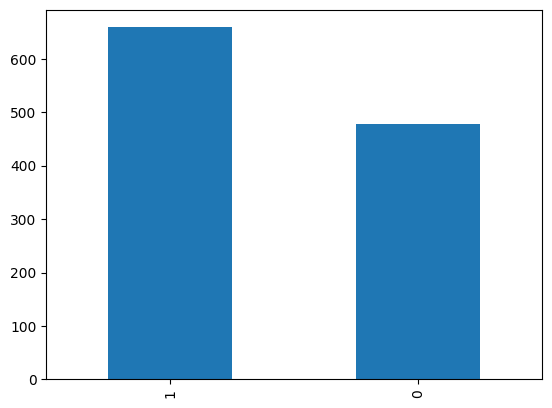

In [ ]:
# checking whether the dataset is balanced
print(df['PlacedOrNot'].value_counts())
df['PlacedOrNot'].value_counts().plot(kind='bar')

<Axes: >

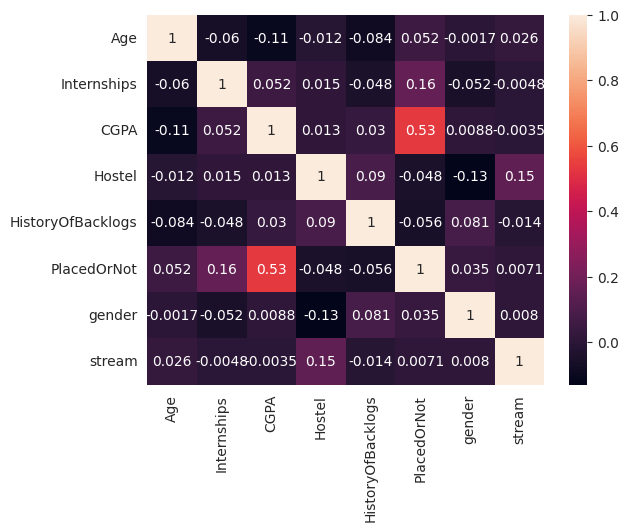

In [ ]:
sns.heatmap(df.corr(),annot=True)

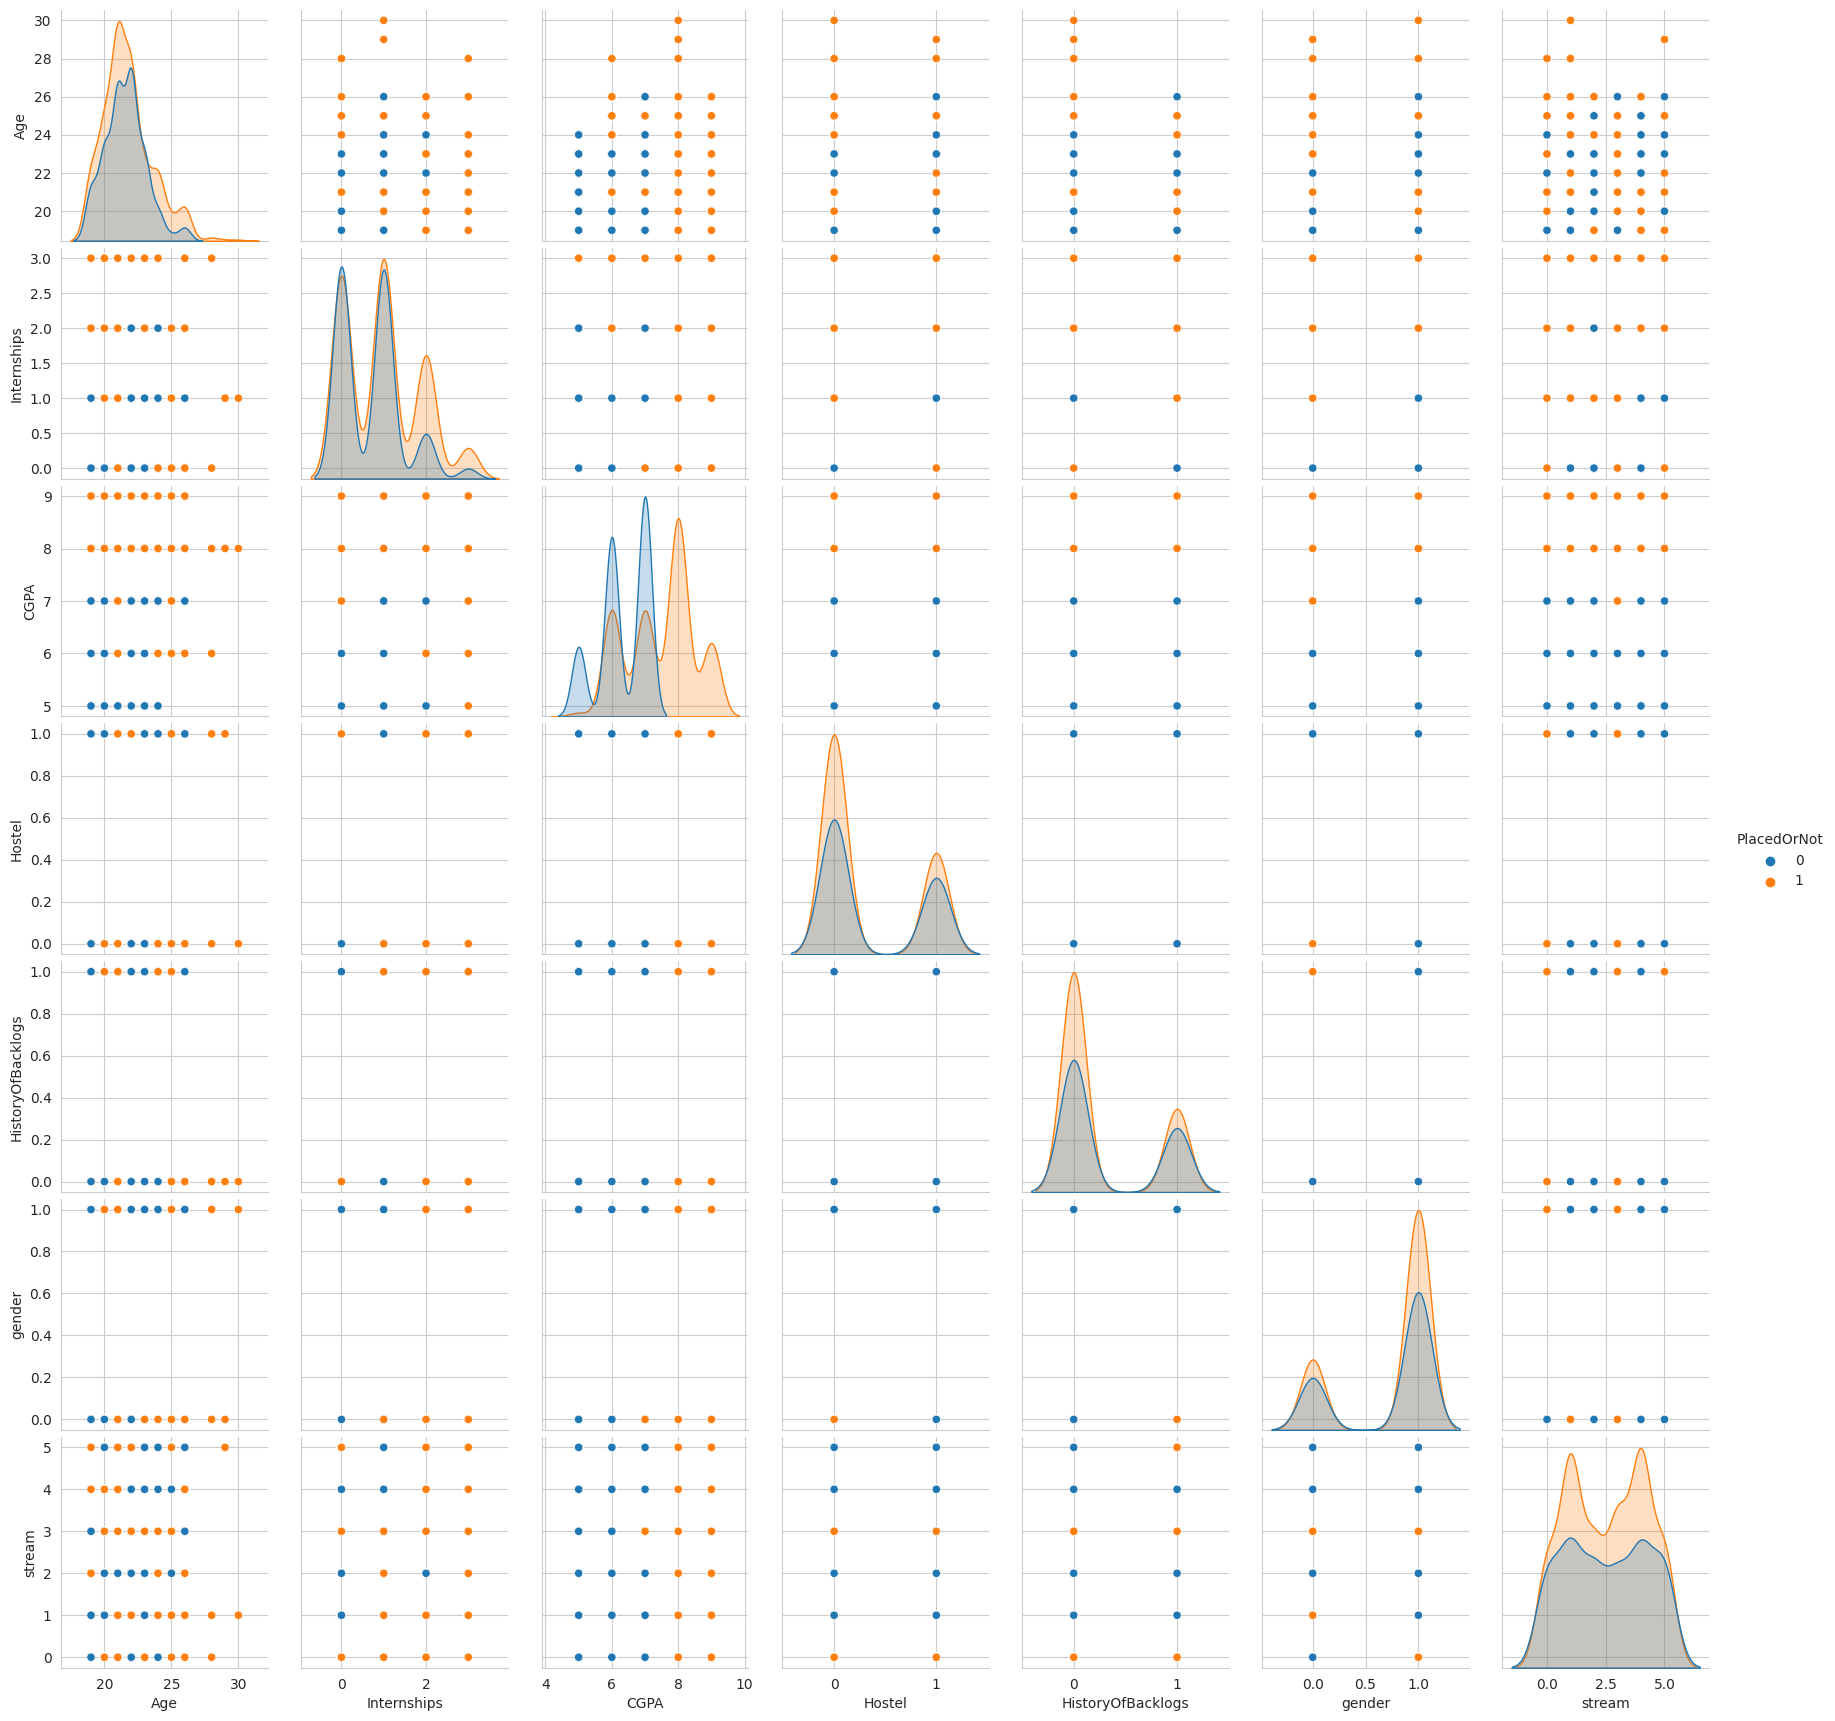

In [ ]:
sns.set_style('whitegrid')
sns.pairplot(data=df,hue='PlacedOrNot')

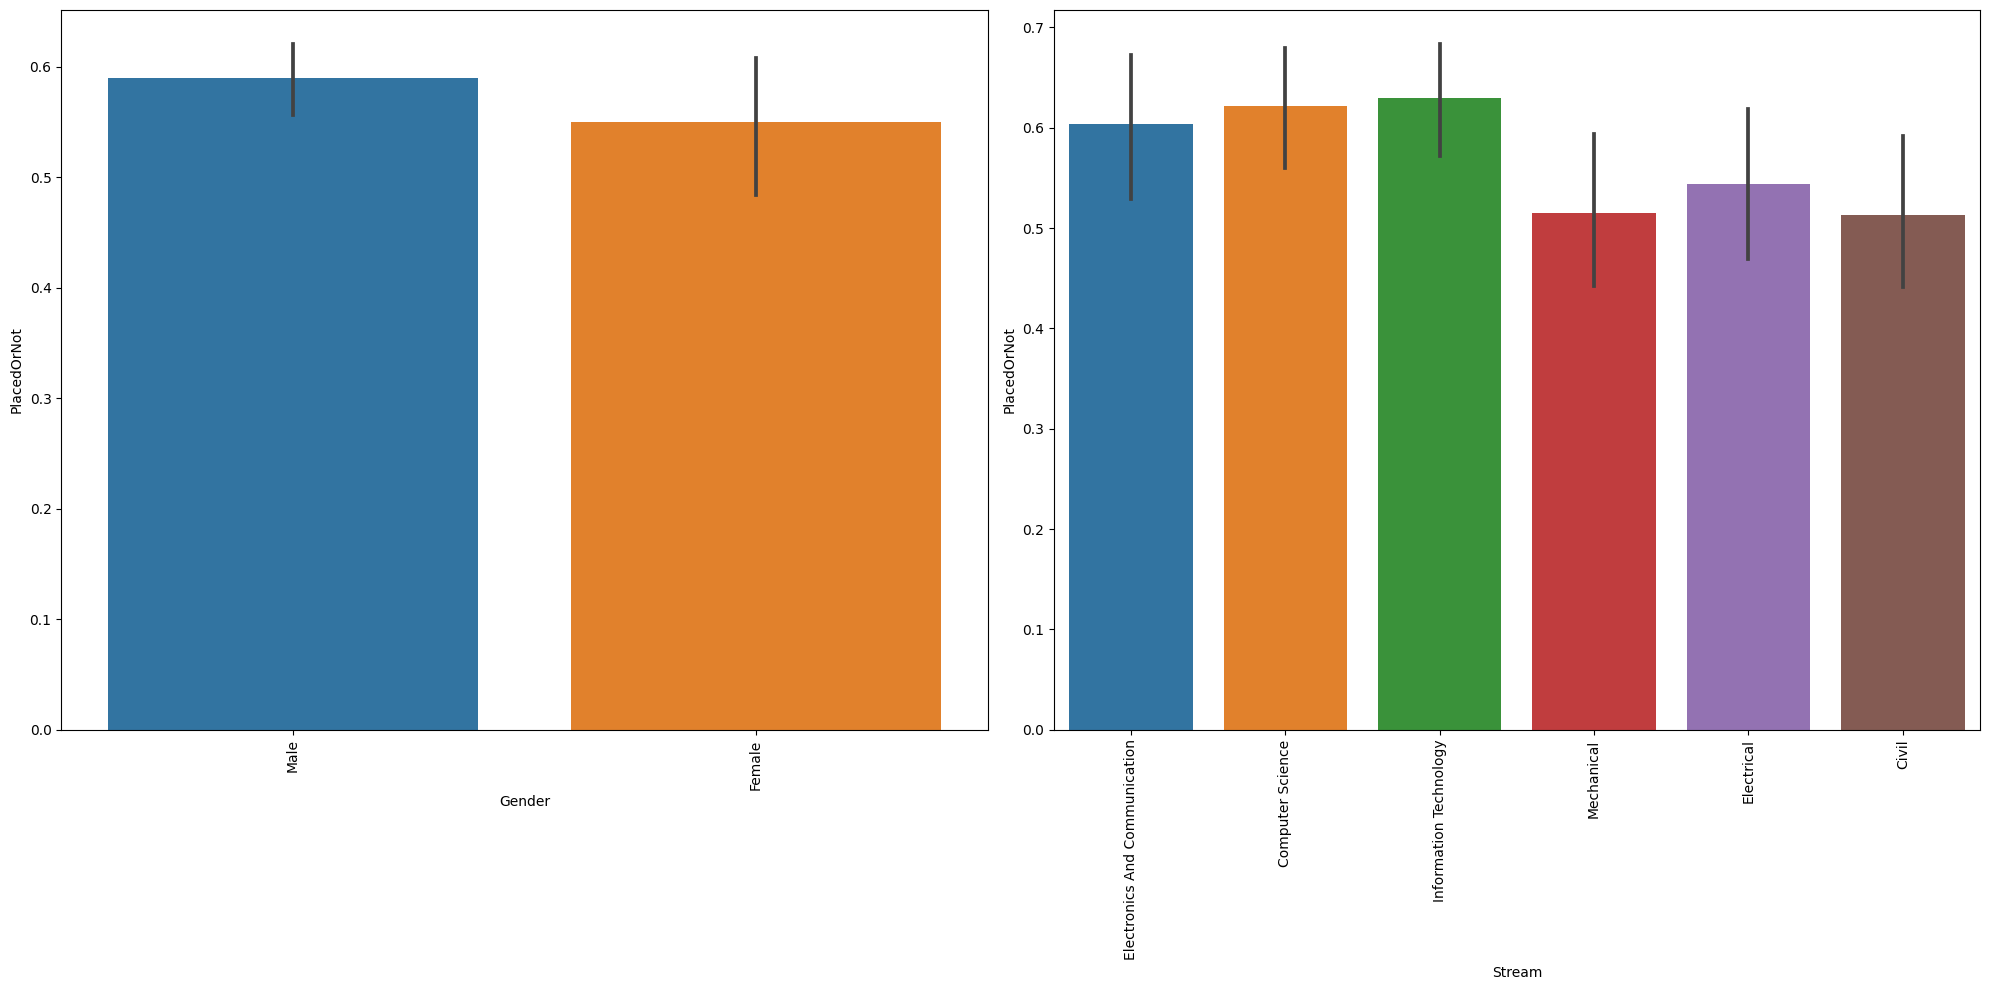

In [18]:
# list of categorical variables to plot
cat_vars = ['Gender','Stream']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.ravel()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='PlacedOrNot', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

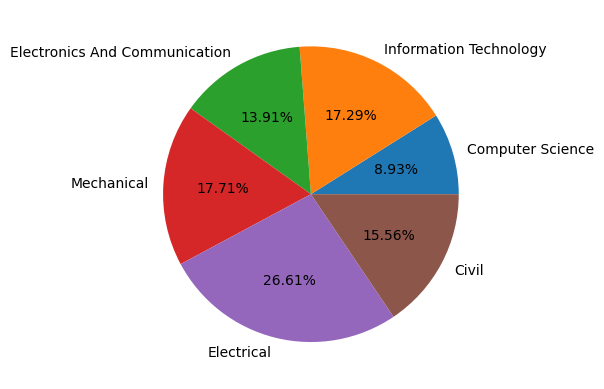

In [42]:
df_s=df[df['PlacedOrNot']==1].groupby('Stream').size().reset_index()
stream_vals=df.Stream.value_counts().values
stream_values=np.array([(78/243)*100,(151/243)*100,(87/174)*100,(105/165)*100,(153/160)*100,(85/152)*100])

# pie chart to find out how many of which stream got placed
stream_names=df.Stream.value_counts().index
stream_vals=df.Stream.value_counts().values

plt.pie(stream_values,labels=stream_names,autopct='%1.2f%%');

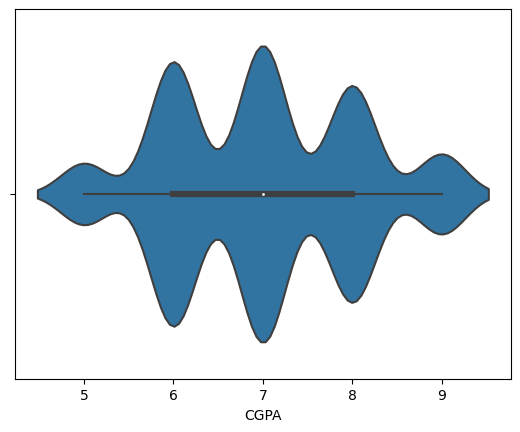

In [46]:
sns.violinplot(x='CGPA', data=df);

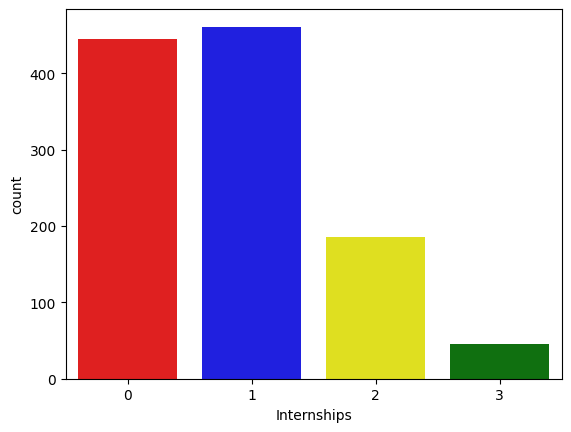

In [54]:
## Count plot
sns.countplot(x="Internships",data=df,palette=['red','blue','yellow','green']);

### Splitting the dataset

In [21]:
y=df['PlacedOrNot']
X=df.drop('PlacedOrNot',axis=1)

In [22]:
print(y.shape)
print(X.shape)

(1137,)
(1137, 7)


In [ ]:
#splitting dataset into train,test and val 
X_temp,X_test,y_temp,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train,X_val,y_train,y_val=train_test_split(X_temp,y_temp,test_size=0.1,random_state=2)
print(f'Shape of X_train {X_train.shape}')
print(f'Shape of y_train {y_train.shape}')
print(f'Shape of X_val{X_val.shape}')
print(f'Shape of y_val{y_val.shape}')
print(f'Shape of X_test{X_test.shape}')
print(f'Shape of y_test{y_test.shape}')

Shape of X_train (818, 7)
Shape of y_train (818,)
Shape of X_val(91, 7)
Shape of y_val(91,)
Shape of X_test(228, 7)
Shape of y_test(228,)


In [ ]:
X_train

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,gender,stream
2119,19,1,5,1,0,1,5
671,22,0,7,0,0,1,2
1720,23,0,6,0,0,1,1
448,28,0,8,1,0,1,0
1235,21,1,8,0,0,0,3
...,...,...,...,...,...,...,...
237,21,2,7,0,0,0,4
2108,21,0,5,0,1,1,1
2526,20,1,6,0,1,1,3
1060,22,2,6,0,0,0,3


### Normalizing the data

In [35]:
scaler = StandardScaler()

In [ ]:
X_train_trf = scaler.fit_transform(X_train)
X_val_trf=scaler.transform(X_val)
X_test_trf = scaler.transform(X_test)

In [ ]:
df_train = pd.DataFrame(X_train_trf, columns = ['Age','Internships','CGPA','Hostel','HistoryOfBacklogs','gender','stream'])
df_train

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,gender,stream
0,-1.561588,0.183787,-1.859933,1.452676,-0.651987,0.612201,1.466506
1,0.217491,-1.009369,-0.001136,-0.688385,-0.651987,0.612201,-0.343758
2,0.810518,-1.009369,-0.930535,-0.688385,-0.651987,0.612201,-0.947180
3,3.775650,-1.009369,0.928262,1.452676,-0.651987,0.612201,-1.550601
4,-0.375535,0.183787,0.928262,-0.688385,-0.651987,-1.633451,0.259663
...,...,...,...,...,...,...,...
813,-0.375535,1.376942,-0.001136,-0.688385,-0.651987,-1.633451,0.863084
814,-0.375535,-1.009369,-1.859933,-0.688385,1.533773,0.612201,-0.947180
815,-0.968562,0.183787,-0.930535,-0.688385,1.533773,0.612201,0.259663
816,0.217491,1.376942,-0.930535,-0.688385,-0.651987,-1.633451,0.259663


In [ ]:
df_val = pd.DataFrame(X_val_trf, columns = ['Age','Internships','CGPA','Hostel','HistoryOfBacklogs','gender','stream'])
df_val

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,gender,stream
0,0.810518,0.183787,-0.001136,-0.688385,-0.651987,0.612201,-0.947180
1,-1.561588,-1.009369,-0.001136,-0.688385,-0.651987,0.612201,-1.550601
2,-1.561588,1.376942,-0.930535,-0.688385,-0.651987,0.612201,0.863084
3,0.217491,-1.009369,-1.859933,-0.688385,-0.651987,0.612201,-0.947180
4,1.403544,-1.009369,-0.930535,-0.688385,-0.651987,0.612201,-0.947180
...,...,...,...,...,...,...,...
86,1.996571,1.376942,-0.930535,-0.688385,-0.651987,0.612201,-0.947180
87,-0.968562,-1.009369,1.857661,1.452676,1.533773,-1.633451,-0.947180
88,1.996571,-1.009369,-0.001136,1.452676,-0.651987,0.612201,1.466506
89,-0.375535,-1.009369,-0.001136,1.452676,1.533773,-1.633451,-0.947180


In [ ]:
df_test = pd.DataFrame(X_test_trf, columns = ['Age','Internships','CGPA','Hostel','HistoryOfBacklogs','gender','stream'])
df_test

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,gender,stream
0,1.403544,-1.009369,-0.930535,1.452676,1.533773,-1.633451,-0.947180
1,-0.375535,0.183787,1.857661,-0.688385,1.533773,0.612201,0.863084
2,-0.968562,-1.009369,0.928262,1.452676,-0.651987,-1.633451,-0.947180
3,-0.375535,-1.009369,-0.930535,-0.688385,-0.651987,0.612201,-0.343758
4,0.217491,1.376942,0.928262,-0.688385,-0.651987,-1.633451,0.259663
...,...,...,...,...,...,...,...
223,0.217491,0.183787,-0.001136,-0.688385,-0.651987,-1.633451,0.863084
224,0.217491,1.376942,-0.001136,-0.688385,-0.651987,0.612201,-0.947180
225,0.217491,-1.009369,-0.930535,1.452676,-0.651987,0.612201,-1.550601
226,-0.375535,0.183787,1.857661,-0.688385,-0.651987,0.612201,-0.947180


### Fitting Logistic Regression with Hyperparameter Tuning 

In [ ]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_val, y_val)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for Mean, Stdev, Param in zip(means, stds, params):
    print("%f (%f) with: %r" % (Mean, Stdev, Param))

Best: 0.744444 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.744444 (0.143559) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.744444 (0.143559) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.744444 (0.143559) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.744444 (0.143559) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.744444 (0.143559) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.744444 (0.143559) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.744444 (0.140663) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.744444 (0.140663) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.740741 (0.141198) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.744074 (0.145339) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.744074 (0.145339) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.733333 (0.136053) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.692593 (0.145617) wit

In [ ]:
clf=LogisticRegression(solver='newton-cg',C=100,n_jobs=-1)

In [ ]:
# fitting logisitic regression with the best obtained parameters
clf.fit(df_train,y_train)

LogisticRegression(C=100, n_jobs=-1, solver='newton-cg')

In [ ]:
y_pred=clf.predict(df_test)
y_train_pred=clf.predict(df_train)

print(f'Train Accuracy {accuracy_score(y_train,y_train_pred)*100}%')
print(f'Test Accuracy {accuracy_score(y_test,y_pred)*100}%')

Train Accuracy 72.73838630806846%
Test Accuracy 69.2982456140351%


#### Confusion Matrix and Classification Report

In [ ]:
print('Classification Report')
target_names = ['Placed','NotPlaced']
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Placed       0.67      0.58      0.62       100
   NotPlaced       0.70      0.78      0.74       128

    accuracy                           0.69       228
   macro avg       0.69      0.68      0.68       228
weighted avg       0.69      0.69      0.69       228



Displaying Confusion Matrix


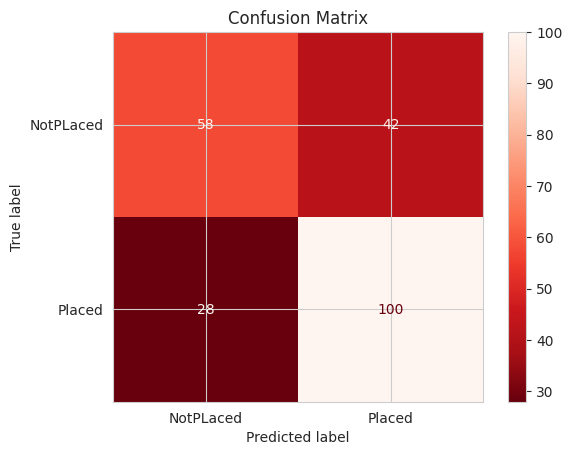

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix')
plt.show()
print('==========================================================')

### Fitting KNN with Hyperparamter Tuning

In [ ]:
model=KNeighborsClassifier()
n_neighbors=[3,5,7,9,11]

In [ ]:
# define grid search
grid = dict(n_neighbors=n_neighbors)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_val, y_val)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.703704 using {'n_neighbors': 9}
0.665556 (0.130978) with: {'n_neighbors': 3}
0.669630 (0.140309) with: {'n_neighbors': 5}
0.687778 (0.140731) with: {'n_neighbors': 7}
0.703704 (0.112632) with: {'n_neighbors': 9}
0.688148 (0.114286) with: {'n_neighbors': 11}


In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)

In [ ]:
# fitting with best paramters

knn.fit(df_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_pred_knn=knn.predict(df_test)
y_train_pred_knn=knn.predict(df_train)

print(f'Train Accuracy {accuracy_score(y_train,y_train_pred_knn)*100}%')
print(f'Test Accuracy {accuracy_score(y_test,y_pred_knn)*100}%')

Train Accuracy 81.54034229828851%
Test Accuracy 70.6140350877193%


#### Confusion Matrix and Classification Report

In [ ]:
print('Classification Report')
target_names = ['Placed','NotPlaced']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Placed       0.67      0.66      0.66       100
   NotPlaced       0.74      0.74      0.74       128

    accuracy                           0.71       228
   macro avg       0.70      0.70      0.70       228
weighted avg       0.71      0.71      0.71       228



Displaying Confusion Matrix


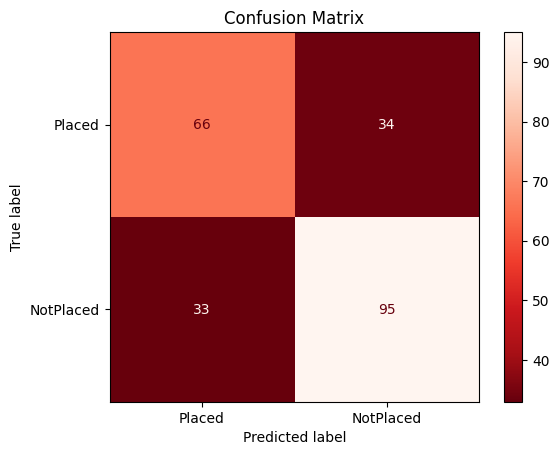

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix')
plt.show()
print('==========================================================')

### Fitting SVM with Hyperparamter Tuning

In [ ]:
model=SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_val, y_val)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.757778 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.669630 (0.125411) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.724074 (0.118116) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.660370 (0.136255) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.665926 (0.147487) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.695556 (0.114021) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.674074 (0.111862) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.659259 (0.129714) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.757778 (0.108806) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.714815 (0.114588) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.542222 (0.061624) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.527778 (0.044790) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.703704 (0.138817) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.527778 (0.044790) with: {'C': 0.01, 'gamma': 'scale',

In [ ]:
svc=SVC(C=1.0,kernel='rbf',gamma='scale')

In [ ]:
#fitting the model with best hyperparamters

svc.fit(df_train,y_train)

SVC()

In [ ]:
y_pred_svc=svc.predict(df_test)
y_train_pred_svc=svc.predict(df_train)

print(f'Train Accuracy {accuracy_score(y_train,y_train_pred_svc)*100}%')
print(f'Test Accuracy {accuracy_score(y_test,y_pred_svc)*100}%')

Train Accuracy 81.78484107579462%
Test Accuracy 74.56140350877193%


#### Confusion Matrix and Classification Report

In [ ]:
print('Classification Report')
target_names = ['Placed','NotPlaced']
print(classification_report(y_test, y_pred_svc, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Placed       0.69      0.75      0.72       100
   NotPlaced       0.79      0.74      0.77       128

    accuracy                           0.75       228
   macro avg       0.74      0.75      0.74       228
weighted avg       0.75      0.75      0.75       228



Displaying Confusion Matrix


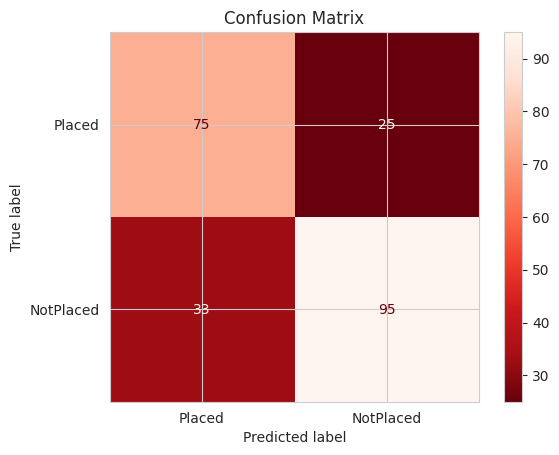

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix')
plt.show()
print('==========================================================')

The above lines tells us that the model is somewhat overfitting

### Fitting Bagging Decision Tree Classifier with Hyperparameter Tuning

In [ ]:
bcdt = BaggingClassifier()
n_estimators = [10, 100, 1000]


In [ ]:
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=bcdt, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_val, y_val)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.780741 using {'n_estimators': 1000}
0.761852 (0.137517) with: {'n_estimators': 10}
0.777037 (0.125082) with: {'n_estimators': 100}
0.780741 (0.129892) with: {'n_estimators': 1000}


In [ ]:
BCDT=BaggingClassifier(n_estimators=1000,n_jobs=-1)

In [ ]:
# fitting with best parameters

BCDT.fit(df_train,y_train)

BaggingClassifier(n_estimators=1000, n_jobs=-1)

In [ ]:
y_pred_bcdt=BCDT.predict(df_test)
y_train_pred_bcdt=BCDT.predict(df_train)

print(f'Train Accuracy {accuracy_score(y_train,y_train_pred_bcdt)*100}%')
print(f'Test Accuracy {accuracy_score(y_test,y_pred_bcdt)*100}%')

Train Accuracy 93.27628361858191%
Test Accuracy 71.9298245614035%


The model is clearly overfitting

#### Confusion Matrix and Classification Report

In [ ]:
print('Classification Report')
target_names = ['Placed','NotPlaced']
print(classification_report(y_test, y_pred_bcdt, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Placed       0.68      0.68      0.68       100
   NotPlaced       0.75      0.75      0.75       128

    accuracy                           0.72       228
   macro avg       0.72      0.72      0.72       228
weighted avg       0.72      0.72      0.72       228



Displaying Confusion Matrix


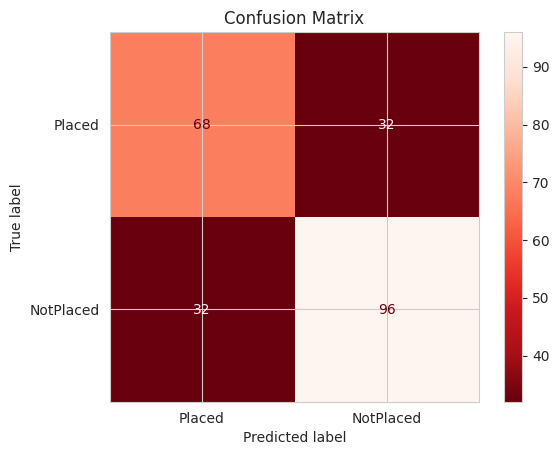

In [ ]:
cm = confusion_matrix(y_test, y_pred_bcdt)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix')
plt.show()
print('==========================================================')

### Fitting Random Forest with Hyperparameter Tuning

In [ ]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

In [ ]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_val, y_val)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.780000 using {'max_features': 'sqrt', 'n_estimators': 100}
0.753704 (0.124857) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.780000 (0.117813) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.765926 (0.104780) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.765926 (0.104780) with: {'max_features': 'log2', 'n_estimators': 10}
0.776667 (0.112156) with: {'max_features': 'log2', 'n_estimators': 100}
0.772963 (0.110207) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
rfc=RandomForestClassifier(max_features='sqrt',n_estimators=100)

In [ ]:

rfc.fit(df_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rfc=rfc.predict(df_test)
y_train_pred_rfc=rfc.predict(df_train)

print(f'Train Accuracy {accuracy_score(y_train,y_train_pred_rfc)*100}%')
print(f'Test Accuracy {accuracy_score(y_test,y_pred_rfc)*100}%')

Train Accuracy 93.27628361858191%
Test Accuracy 69.2982456140351%


We can clearly see that the model is overfitting

#### Confusion Matrix and Classfication Report

In [ ]:
print('Classification Report')
target_names = ['Placed','NotPlaced']
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Placed       0.66      0.63      0.64       100
   NotPlaced       0.72      0.74      0.73       128

    accuracy                           0.69       228
   macro avg       0.69      0.69      0.69       228
weighted avg       0.69      0.69      0.69       228



Displaying Confusion Matrix


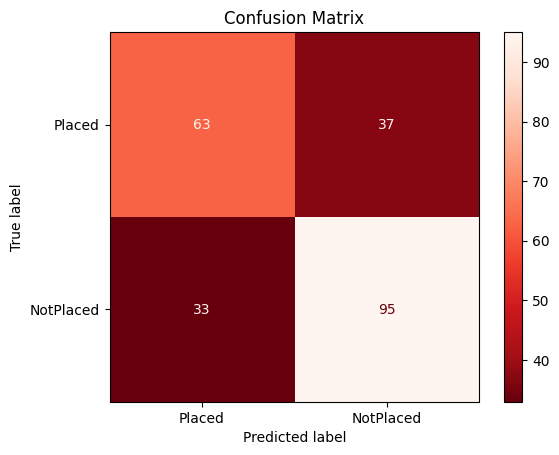

In [ ]:
cm = confusion_matrix(y_test, y_pred_rfc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix')
plt.show()
print('==========================================================')

### Fitting Multilayer Perceptron Model with Hyperparameter Tuning

In [ ]:
model=MLPClassifier()
activation=['identity','relu','tanh','logistic']
solver=['adam','sgd','lbfgs']
alpha=[0.1,0.01,0.001,0.0001]
learning_rate=['adaptive','constant','invscaling']
hidden_layer_sizes=[(8,),(16,),(32,),(64,),(128,)]


In [ ]:
# define grid search
grid = dict(activation=activation,solver=solver,alpha=alpha,learning_rate=learning_rate,hidden_layer_sizes=hidden_layer_sizes)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(df_val, y_val)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.777778 using {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (16,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.682963 (0.165072) with: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (8,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.695926 (0.131546) with: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (8,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.744444 (0.143559) with: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (8,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.670370 (0.157117) with: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (8,), 'learning_rate': 'constant', 'solver': 'adam'}
0.696667 (0.141803) with: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (8,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.744444 (0.143559) with: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (8,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
0.725926 

In [ ]:
MLP=MLPClassifier(activation='logistic',alpha=0.1,hidden_layer_sizes=(16,),learning_rate='constant',solver='lbfgs',max_iter=100)


In [ ]:
MLP.fit(df_train,y_train)

In [ ]:
y_pred_mlp=MLP.predict(df_test)
y_train_pred_mlp=MLP.predict(df_train)

print(f'Train Accuracy {accuracy_score(y_train,y_train_pred_mlp)*100}%')
print(f'Test Accuracy {accuracy_score(y_test,y_pred_mlp)*100}%')

Train Accuracy 86.18581907090464%
Test Accuracy 75.0%


### Ensemble Learning Stacking Classifier

In [ ]:
estimators=[
    ('svc',svc),
    ('dt',BCDT),
    ('rf',rfc),
    ('mlp',MLP),
    ('knn',knn)
]

stack_model=StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

In [ ]:
stack_model.fit(df_train,y_train)

In [ ]:
y_pred_sm=stack_model.predict(df_test)
y_train_pred_sm=stack_model.predict(df_train)

print(f'Train Accuracy {accuracy_score(y_train,y_train_pred_sm)*100}%')
print(f'Test Accuracy {accuracy_score(y_test,y_pred_sm)*100}%')

Train Accuracy 83.98533007334963%
Test Accuracy 76.31578947368422%


Accuracy obtained is not so good hence trying to improve accuracy as well as address overfitting.

### Trying SMOTE to oversample

In [23]:
smote=SMOTE(sampling_strategy={1:2000, 0:2000},random_state=42)
X_res_n,y_res_n=smote.fit_resample(X,y)

/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (2000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 659)
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (2000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 659)
  warnings.warn(


In [25]:
X_res_n.shape

(4000, 7)

Deciding to drop gender to erase bias.

In [26]:
X_res_n=X_res_n.drop('gender',axis=1)

In [27]:
X_res_n

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,stream
0,22,1,8,1,1,3
1,21,0,7,1,1,1
2,22,1,6,0,0,4
3,21,0,8,0,1,4
4,22,0,8,1,0,5
...,...,...,...,...,...,...
3995,22,0,8,0,0,3
3996,21,0,6,0,0,2
3997,21,2,7,0,0,3
3998,23,1,8,0,0,4


In [28]:
X_res_n.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,stream
count,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000
mean,21.481000,0.714000,6.82200,0.278000,0.227250,2.426500
std,1.674616,0.768018,1.03638,0.448069,0.419108,1.674903
min,19.000000,0.000000,5.00000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,6.00000,0.000000,0.000000,1.000000
50%,21.000000,1.000000,7.00000,0.000000,0.000000,2.000000
75%,22.000000,1.000000,8.00000,1.000000,0.000000,4.000000
max,30.000000,3.000000,9.00000,1.000000,1.000000,5.000000


In [29]:
y_res_n


0       1
1       1
2       1
3       1
4       1
       ..
3995    1
3996    1
3997    1
3998    1
3999    1
Name: PlacedOrNot, Length: 4000, dtype: int64

In [30]:
y_res_n.value_counts()

1    2000
0    2000
Name: PlacedOrNot, dtype: int64

In [31]:
#splitting dataset into train,test and val 
X_temp_n,X_test_n,y_temp_n,y_test_n=train_test_split(X_res_n,y_res_n,test_size=0.2,random_state=2)
X_train_n,X_val_n,y_train_n,y_val_n=train_test_split(X_temp_n,y_temp_n,test_size=0.1,random_state=2)
print(f'Shape of X_train {X_train_n.shape}')
print(f'Shape of y_train {y_train_n.shape}')
print(f'Shape of X_val{X_val_n.shape}')
print(f'Shape of y_val{y_val_n.shape}')
print(f'Shape of X_test{X_test_n.shape}')
print(f'Shape of y_test{y_test_n.shape}')

Shape of X_train (2880, 6)
Shape of y_train (2880,)
Shape of X_val(320, 6)
Shape of y_val(320,)
Shape of X_test(800, 6)
Shape of y_test(800,)


In [32]:
df_train_new = pd.DataFrame(X_temp_n, columns = ['Age','Internships','CGPA','Hostel','HistoryOfBacklogs','gender','stream'])
df_train_new

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,gender,stream
1617,21,0,7,0,0,NaN,4
3157,21,2,6,0,0,NaN,3
2960,22,0,7,0,0,NaN,3
1189,25,1,7,0,0,NaN,3
2676,21,2,6,0,0,NaN,4
...,...,...,...,...,...,...,...
3606,22,0,8,0,0,NaN,3
1608,23,0,6,0,0,NaN,0
2541,23,1,6,0,1,NaN,0
2575,21,2,6,0,1,NaN,2


In [33]:
df_test_new = pd.DataFrame(X_test_n, columns = ['Age','Internships','CGPA','Hostel','HistoryOfBacklogs','gender','stream'])
df_test_new

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,gender,stream
3846,19,2,7,0,0,NaN,1
848,20,2,8,0,0,NaN,1
1658,21,0,6,1,0,NaN,2
3415,23,0,8,0,0,NaN,0
3678,22,1,9,1,0,NaN,4
...,...,...,...,...,...,...,...
1512,23,1,7,0,0,NaN,4
1763,20,1,5,0,0,NaN,4
2608,19,0,6,0,0,NaN,2
265,21,1,6,1,0,NaN,4


In [36]:
X_res_train_trf=scaler.fit_transform(X_temp_n)
X_res_test_trf=scaler.fit_transform(X_test_n)

In [39]:
df_test_new_res = pd.DataFrame(X_res_test_trf, columns = ['Age','Internships','CGPA','Hostel','HistoryOfBacklogs','stream'])
df_test_new_res

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,stream
0,-1.544771,1.653846,0.125198,-0.641042,-0.536884,-0.854439
1,-0.918724,1.653846,1.079084,-0.641042,-0.536884,-0.854439
2,-0.292677,-0.910256,-0.828689,1.559960,-0.536884,-0.246838
3,0.959417,-0.910256,1.079084,-0.641042,-0.536884,-1.462041
4,0.333370,0.371795,2.032970,1.559960,-0.536884,0.968365
...,...,...,...,...,...,...
795,0.959417,0.371795,0.125198,-0.641042,-0.536884,0.968365
796,-0.918724,0.371795,-1.782575,-0.641042,-0.536884,0.968365
797,-1.544771,-0.910256,-0.828689,-0.641042,-0.536884,-0.246838
798,-0.292677,0.371795,-0.828689,1.559960,-0.536884,0.968365


In [40]:
df_train_new_res = pd.DataFrame(X_res_train_trf, columns = ['Age','Internships','CGPA','Hostel','HistoryOfBacklogs','stream'])
df_train_new_res

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,stream
0,-0.286085,-0.934800,0.183650,-0.615399,-0.543642,0.932596
1,-0.286085,1.680026,-0.784521,-0.615399,-0.543642,0.337994
2,0.304543,-0.934800,0.183650,-0.615399,-0.543642,0.337994
3,2.076427,0.372613,0.183650,-0.615399,-0.543642,0.337994
4,-0.286085,1.680026,-0.784521,-0.615399,-0.543642,0.932596
...,...,...,...,...,...,...
3195,0.304543,-0.934800,1.151821,-0.615399,-0.543642,0.337994
3196,0.895171,-0.934800,-0.784521,-0.615399,-0.543642,-1.445812
3197,0.895171,0.372613,-0.784521,-0.615399,1.839446,-1.445812
3198,-0.286085,1.680026,-0.784521,-0.615399,1.839446,-0.256608


### Fitting the above models again

#### Ensemble Model

In [ ]:
stacked_model_new=StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

In [ ]:
stacked_model_new.fit(X_temp_n,y_temp_n)

In [ ]:
#Without normalization 
y_pred_smn=stacked_model_new.predict(X_test_n)
y_train_pred_smn=stacked_model_new.predict(X_temp_n)

print(f'Train Accuracy {accuracy_score(y_temp_n,y_train_pred_smn)*100}%')
print(f'Test Accuracy {accuracy_score(y_test_n,y_pred_smn)*100}%')

Train Accuracy 91.5625%
Test Accuracy 86.25%


In [ ]:
stacked_model_new.fit(df_train_new_res,y_temp_n)

In [ ]:
#With normalization 
y_pred_smnn=stacked_model_new.predict(df_test_new_res)
y_train_pred_smnn=stacked_model_new.predict(df_train_new_res)

print(f'Train Accuracy {accuracy_score(y_temp_n,y_train_pred_smnn)*100}%')
print(f'Test Accuracy {accuracy_score(y_test_n,y_pred_smnn)*100}%')

Train Accuracy 90.375%
Test Accuracy 85.0%


### Deciding to drop Hostel feature 

In [46]:
df_train_new_res=df_train_new_res.drop('Hostel',axis=1)
df_test_new_res=df_test_new_res.drop('Hostel',axis=1)

In [47]:
X_temp_n=X_temp_n.drop('Hostel',axis=1)
X_test_n=X_test_n.drop('Hostel',axis=1)

In [ ]:
stacked_model_new.fit(X_temp_n,y_temp_n)

In [ ]:
#Without normalization 
y_pred_smh=stacked_model_new.predict(X_test_n)
y_train_pred_smh=stacked_model_new.predict(X_temp_n)

print(f'Train Accuracy {accuracy_score(y_temp_n,y_train_pred_smh)*100}%')
print(f'Test Accuracy {accuracy_score(y_test_n,y_pred_smh)*100}%')

Train Accuracy 90.375%
Test Accuracy 85.875%


### XGboost Classifier

In [49]:
classifier = XGBClassifier(base_score=0.5,booster='gbtree',colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                           grow_policy='depthwise',learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,num_parallel_tree=1,)

In [50]:

classifier.fit(X_temp_n,y_temp_n)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=None, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=1, predictor=None,
              random_state=None, ...)

In [51]:
y_pred_x=classifier.predict(X_test_n)
y_train_pred_x=classifier.predict(X_temp_n)

print(f'Train Accuracy {accuracy_score(y_temp_n,y_train_pred_x)*100}%')
print(f'Test Accuracy {accuracy_score(y_test_n,y_pred_x)*100}%')

Train Accuracy 88.84375%
Test Accuracy 86.25%


In [53]:
print('Classification Report')
target_names = ['Placed','NotPlaced']
print(classification_report(y_test_n, y_pred_x, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Placed       0.84      0.88      0.86       390
   NotPlaced       0.88      0.84      0.86       410

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800



Displaying Confusion Matrix


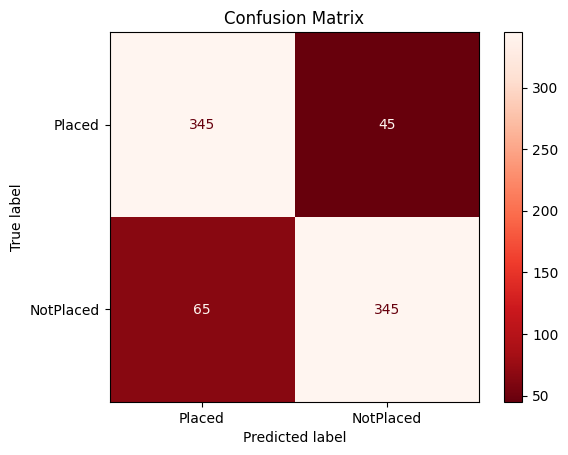

In [54]:
cm = confusion_matrix(y_test_n, y_pred_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Reds_r)
print('Displaying Confusion Matrix')
print('==========================================================')
plt.title('Confusion Matrix')
plt.show()
print('==========================================================')

Decinding to save this XgBoost Model

In [52]:
import pickle
pickle.dump(classifier,open('/content/gdrive/MyDrive/xgb_classifier_final.pkl','wb'))

### AdaBoost Classifier

In [37]:
estimator=DecisionTreeClassifier(max_depth=None)
clf=AdaBoostClassifier(estimator=estimator,n_estimators=100,random_state=42)
clf.fit(X_temp_n,y_temp_n)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=42)

In [38]:
y_pred_ab=clf.predict(X_test_n)
y_train_pred_ab=clf.predict(X_temp_n)

print(f'Train Accuracy {accuracy_score(y_temp_n,y_train_pred_ab)*100}%')
print(f'Test Accuracy {accuracy_score(y_test_n,y_pred_ab)*100}%')

Train Accuracy 90.59375%
Test Accuracy 85.875%
